In [1]:
cd c:\dev\keras

c:\dev\keras


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

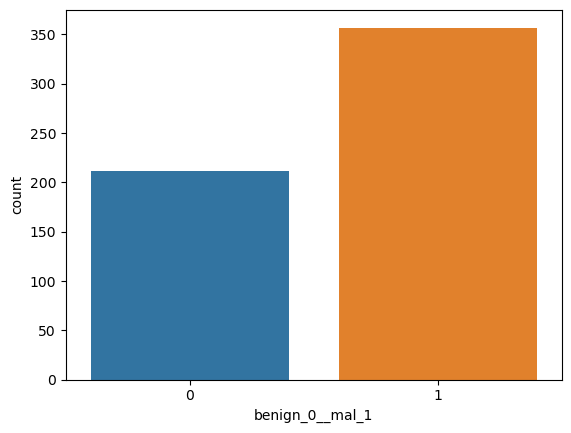

In [5]:
sns.countplot(x='benign_0__mal_1', data=df)

<Axes: >

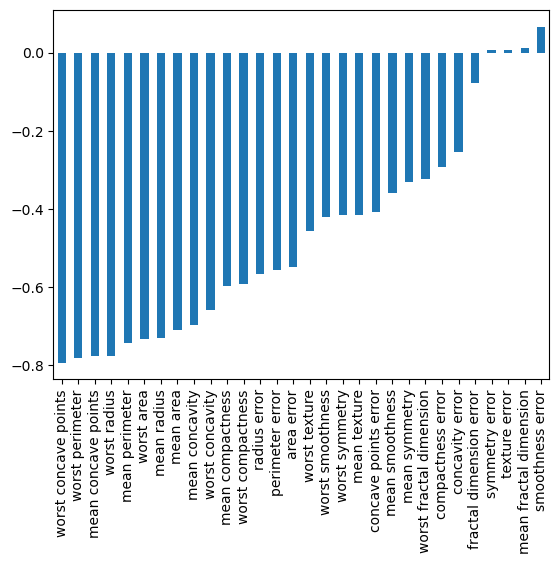

In [6]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<Axes: >

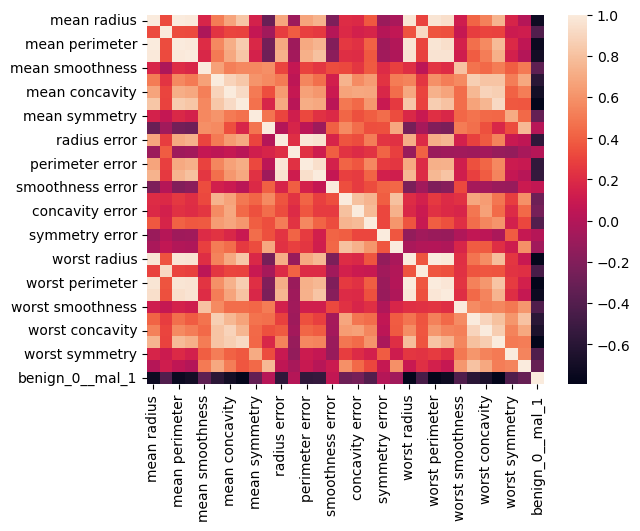

In [7]:
sns.heatmap(df.corr())

In [8]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [15]:
X_train.shape

(426, 30)

In [16]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [17]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data = (X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.6823 - val_loss: 0.6603
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6496 - val_loss: 0.6316
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6188 - val_loss: 0.5956
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5794 - val_loss: 0.5515
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5317 - val_loss: 0.4977
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4772 - val_loss: 0.4396
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4222 - val_loss: 0.3839
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3712 - val_loss: 0.3317
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3306 - val_loss: 0.2931
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3003 - val_loss: 0.2649
Epoch 11

14/14 [==============================] - 0s 2ms/step - loss: 0.0514 - val_loss: 0.1043
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0523 - val_loss: 0.1111
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0512 - val_loss: 0.1103
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0517 - val_loss: 0.1121
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0526 - val_loss: 0.1134
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0498 - val_loss: 0.1069
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0500 - val_loss: 0.1098
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0503 - val_loss: 0.1071
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0525 - val_loss: 0.1143
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0513 - val_loss: 0.1143
Epoch 93/600


14/14 [==============================] - 0s 2ms/step - loss: 0.0423 - val_loss: 0.1396
Epoch 165/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0436 - val_loss: 0.1246
Epoch 166/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0433 - val_loss: 0.1457
Epoch 167/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0446 - val_loss: 0.1276
Epoch 168/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0413 - val_loss: 0.1335
Epoch 169/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0441 - val_loss: 0.1223
Epoch 170/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0449 - val_loss: 0.1388
Epoch 171/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0414 - val_loss: 0.1342
Epoch 172/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0470 - val_loss: 0.1365
Epoch 173/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0503 - val_loss: 0.1155
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0358 - val_loss: 0.1516
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0350 - val_loss: 0.1468
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0350 - val_loss: 0.1496
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0348 - val_loss: 0.1448
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0371 - val_loss: 0.1428
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0345 - val_loss: 0.1480
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0346 - val_loss: 0.1548
Epoch 252/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0360 - val_loss: 0.1401
Epoch 253/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0354 - val_loss: 0.1426
Epoch 254/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0354 - val_loss: 0.1446
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0344 - val_loss: 0.1843
Epoch 327/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0318 - val_loss: 0.1561
Epoch 328/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0296 - val_loss: 0.1705
Epoch 329/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0316 - val_loss: 0.1429
Epoch 330/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0391 - val_loss: 0.2181
Epoch 331/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0381 - val_loss: 0.1486
Epoch 332/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0349 - val_loss: 0.1637
Epoch 333/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0316 - val_loss: 0.1633
Epoch 334/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0316 - val_loss: 0.1810
Epoch 335/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0305 - val_loss: 0.1601
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0304 - val_loss: 0.1693
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0256 - val_loss: 0.1924
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0269 - val_loss: 0.1713
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0280 - val_loss: 0.1939
Epoch 411/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0282 - val_loss: 0.1660
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0293 - val_loss: 0.1685
Epoch 413/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0294 - val_loss: 0.1793
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0254 - val_loss: 0.1764
Epoch 415/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0269 - val_loss: 0.1734
Epoch 416/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0256 - val_loss: 0.1758
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0233 - val_loss: 0.2020
Epoch 489/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0221 - val_loss: 0.1791
Epoch 490/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0242 - val_loss: 0.1828
Epoch 491/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0246 - val_loss: 0.2106
Epoch 492/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0235 - val_loss: 0.2039
Epoch 493/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0253 - val_loss: 0.2051
Epoch 494/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0279 - val_loss: 0.1895
Epoch 495/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0219 - val_loss: 0.1984
Epoch 496/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0231 - val_loss: 0.1995
Epoch 497/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0246 - val_loss: 0.2113
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0227 - val_loss: 0.1860
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0224 - val_loss: 0.2089
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0194 - val_loss: 0.1979
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0196 - val_loss: 0.2086
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0206 - val_loss: 0.2004
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0222 - val_loss: 0.2124
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0263 - val_loss: 0.2243
Epoch 576/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0208 - val_loss: 0.2018
Epoch 577/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0199 - val_loss: 0.2161
Epoch 578/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0205 - val_loss: 0.2088
Epoc

In [18]:
losses = pd.DataFrame(model.history.history)

<Axes: >

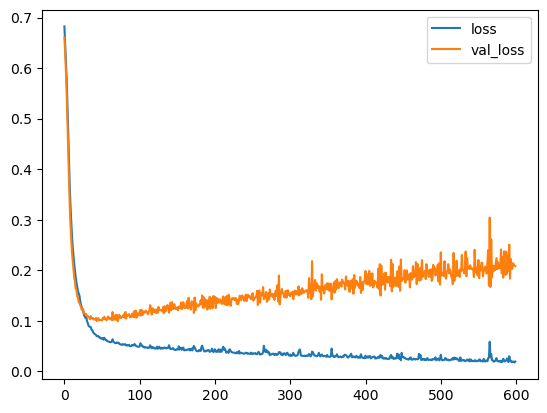

In [19]:
losses.plot() # jezeli loss maleje a val_loss rosnie to zlwe

In [20]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [23]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data = (X_test,y_test), callbacks=[early_stopping])

Epoch 1/600
14/14 [==============================] - 1s 9ms/step - loss: 0.7205 - val_loss: 0.6909
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6803 - val_loss: 0.6606
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6463 - val_loss: 0.6247
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6051 - val_loss: 0.5788
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5601 - val_loss: 0.5307
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5111 - val_loss: 0.4818
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4625 - val_loss: 0.4322
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4161 - val_loss: 0.3861
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3715 - val_loss: 0.3418
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3321 - val_loss: 0.3049
Epoch 11/

In [24]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

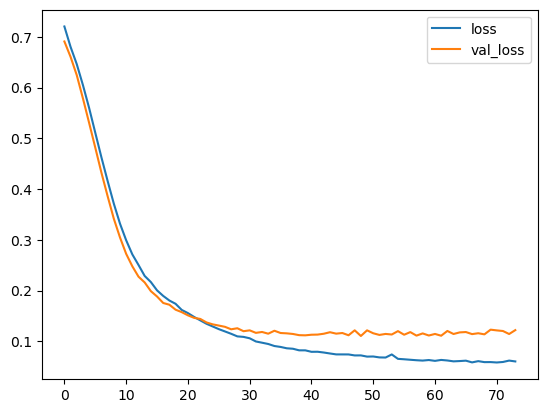

In [25]:
model_loss.plot()

In [26]:
from tensorflow.keras.layers import Dropout

In [28]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5)) # w kazdej epoch polowa neuronow bedzie wylaczana

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5)) # w kazdej epoch polowa neuronow bedzie wylaczana

# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [29]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data = (X_test,y_test), callbacks=[early_stopping])

Epoch 1/600
14/14 [==============================] - 1s 8ms/step - loss: 0.7324 - val_loss: 0.7115
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.7098 - val_loss: 0.6846
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6818 - val_loss: 0.6624
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6539 - val_loss: 0.6440
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6591 - val_loss: 0.6253
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6320 - val_loss: 0.6046
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6148 - val_loss: 0.5808
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6140 - val_loss: 0.5540
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5581 - val_loss: 0.5281
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5683 - val_loss: 0.5016
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.1303 - val_loss: 0.1139
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1343 - val_loss: 0.0957
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1378 - val_loss: 0.0952
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1206 - val_loss: 0.0928
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1132 - val_loss: 0.1022
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1286 - val_loss: 0.0918
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1071 - val_loss: 0.0924
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1134 - val_loss: 0.0897
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1182 - val_loss: 0.1001
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0969 - val_loss: 0.0948
Epoch 93/600


In [30]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

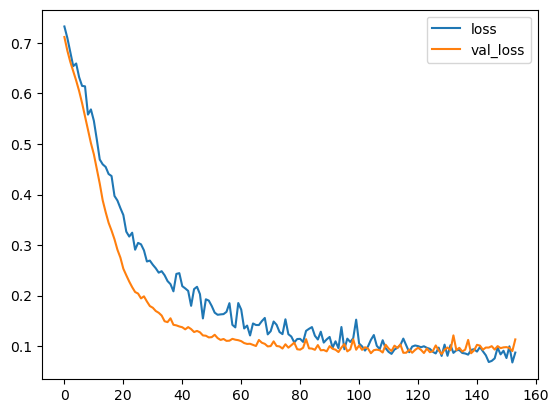

In [31]:
model_loss.plot()

In [35]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 750us/step


In [36]:
predictions

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.99      0.94      0.97        88

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [40]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 5 83]]
